In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

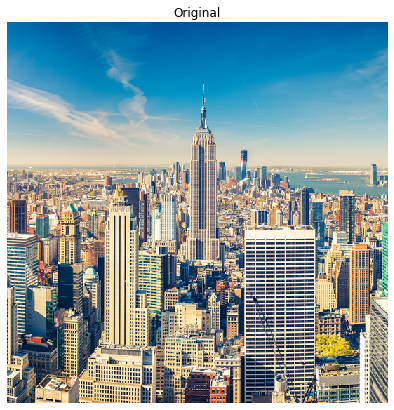

In [2]:
img = cv2.imread("data/NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.title("Original")
plt.imshow(img)
plt.axis("off");

# Blurring

* Blurring reduces details but it blocks noise out.

## Mean Blurring

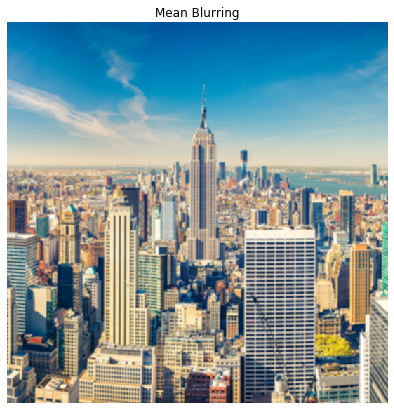

In [3]:
dst2 = cv2.blur(src=img, ksize=(3,3))

plt.figure(figsize=(7,7)),plt.title("Mean Blurring"),plt.imshow(dst2),plt.axis("off");

## Gaussian Blurring

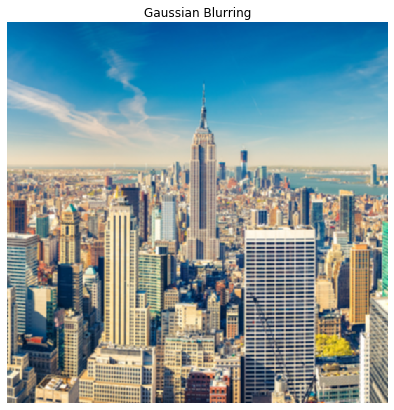

In [4]:
gb = cv2.GaussianBlur(src=img, ksize=(3,3), sigmaX=7)

plt.figure(figsize=(7,7)),plt.title("Gaussian Blurring"),plt.imshow(gb),plt.axis("off");

# Median Blurring

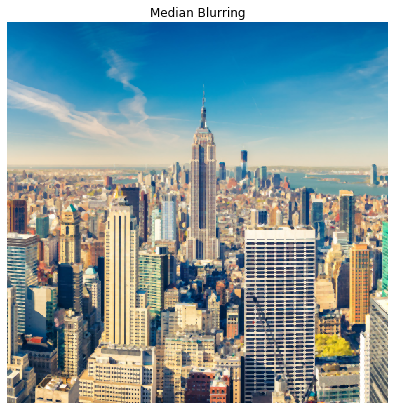

In [5]:
mb = cv2.medianBlur(src=img, ksize=3)

plt.figure(figsize=(7,7)),plt.title("Median Blurring"),plt.imshow(mb),plt.axis("off");

# Gaussian Noise

In [6]:
def gaussianNoise(image):
    
    row, col, ch = image.shape
    mean = 0
    var = 0.05 # varyans
    sigma = var*0.5 # std
    
    gauss = np.random.normal(mean, sigma, (row,col, ch)) # other name of gaussian is normal
    gauss = gauss.reshape(row,col,ch) # be sure its shape again!
    noisy = image + gauss # add noise to image
    
    return noisy

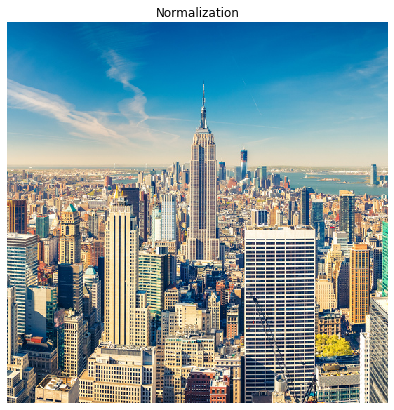

In [7]:
img = cv2.imread("data/NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255. # normalization

plt.figure(figsize=(7,7)),plt.title("Normalization"),plt.imshow(img),plt.axis("off");

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


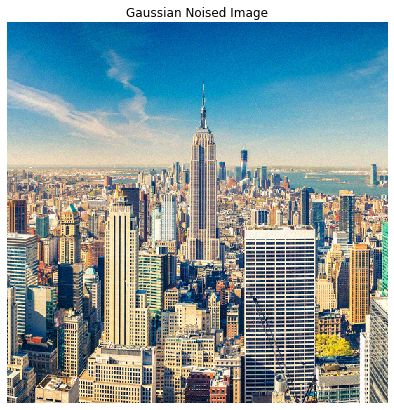

In [8]:
gaussianNoisyImage = gaussianNoise(img)

plt.figure(figsize=(7,7)),plt.title("Gaussian Noised Image"),plt.imshow(gaussianNoisyImage),plt.axis("off");

# Gaussian Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


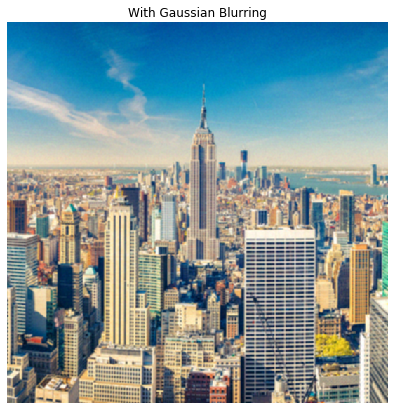

In [9]:
gb2 = cv2.GaussianBlur(src=gaussianNoisyImage, ksize=(3,3), sigmaX=7)

plt.figure(figsize=(7,7)),plt.title("With Gaussian Blurring"),plt.imshow(gb2),plt.axis("off");

# Creating Black and White Points

In [10]:
def saltPepperNoise(image):
    
    row, col, ch = image.shape
    s_vs_p = 0.5
    
    amount = 0.004
    
    noisy = np.copy(image)
    
    # salt (white points)
    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i-1, int(num_salt)) for i in img.shape] # define coordinators randomly
    noisy[coords] = 1 # white color
    
    # pepper (black points)
    num_pepper = np.ceil(amount * img.size * (1-s_vs_p))
    coords = [np.random.randint(0, i-1, int(num_pepper)) for i in img.shape] # define coordinators randomly
    noisy[coords] = 0 # black color
    
    return noisy

# Apply to Original Image

D:\ANACONDA\envs\tensor_v2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
D:\ANACONDA\envs\tensor_v2\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


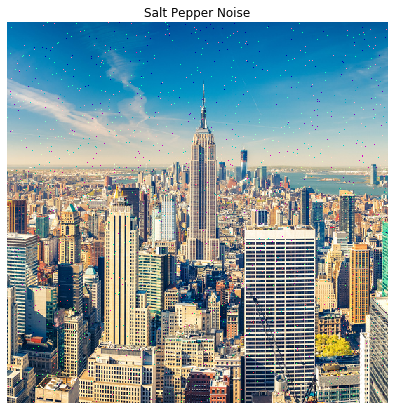

In [11]:
sp_image = saltPepperNoise(img)

plt.figure(figsize=(7,7)),plt.title("Salt Pepper Noise"),plt.imshow(sp_image),plt.axis("off");

# Median Blurring

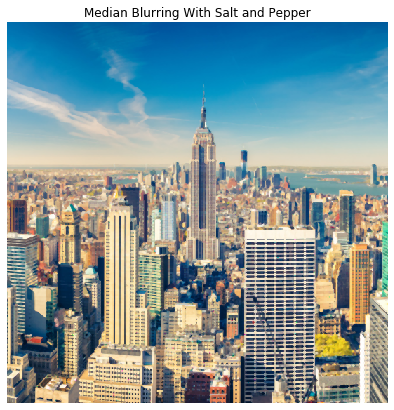

In [12]:
mb2 = cv2.medianBlur(src=sp_image.astype(np.float32), ksize=3)

plt.figure(figsize=(7,7)),plt.title("Median Blurring With Salt and Pepper"),plt.imshow(mb2),plt.axis("off");